<a href="https://colab.research.google.com/github/faan03/random/blob/master/Random_Forest_by_Fredy_Aponte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Random Forest**

**Ensembles**

Concepto General

**Random Forest** y Gradient Boosted Trees, forman parte de una familia de algoritmos que se denominan ensembles.

Ensemble = Submodelos → Entrenamiento → Predicciones (Intermedias) → Voto → Prediccion (final)
 
### ***Cómo funciona el algoritmo Random Forest?***

Se generar cientos de modelos de arboles de decisión que serán entrenados sobre conjuntos de datos ***bootstrapeados*** del conjunto de datos original y donde para cada etapa de separación el conjunto de caracteristicas elegibles sera un subconjunto aleatorio del conjunto original de caracteristicas.

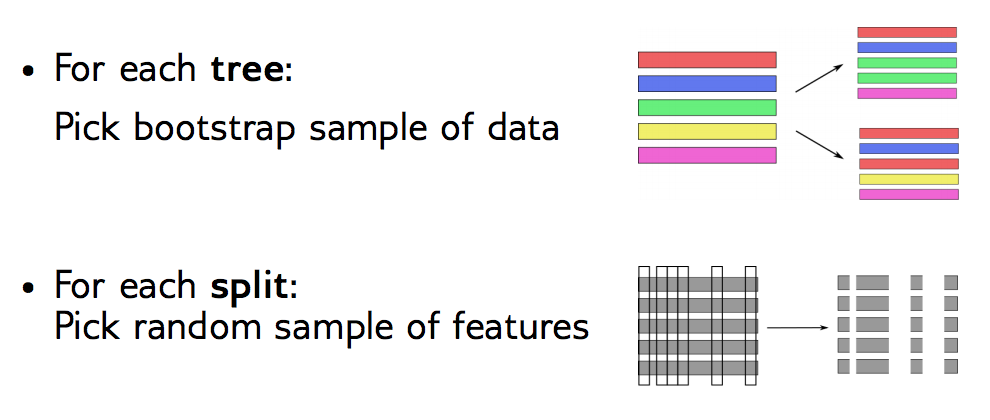

Cada uno de los arboles entrenados luego podrá votar por su predicción y se promedian estos votos.

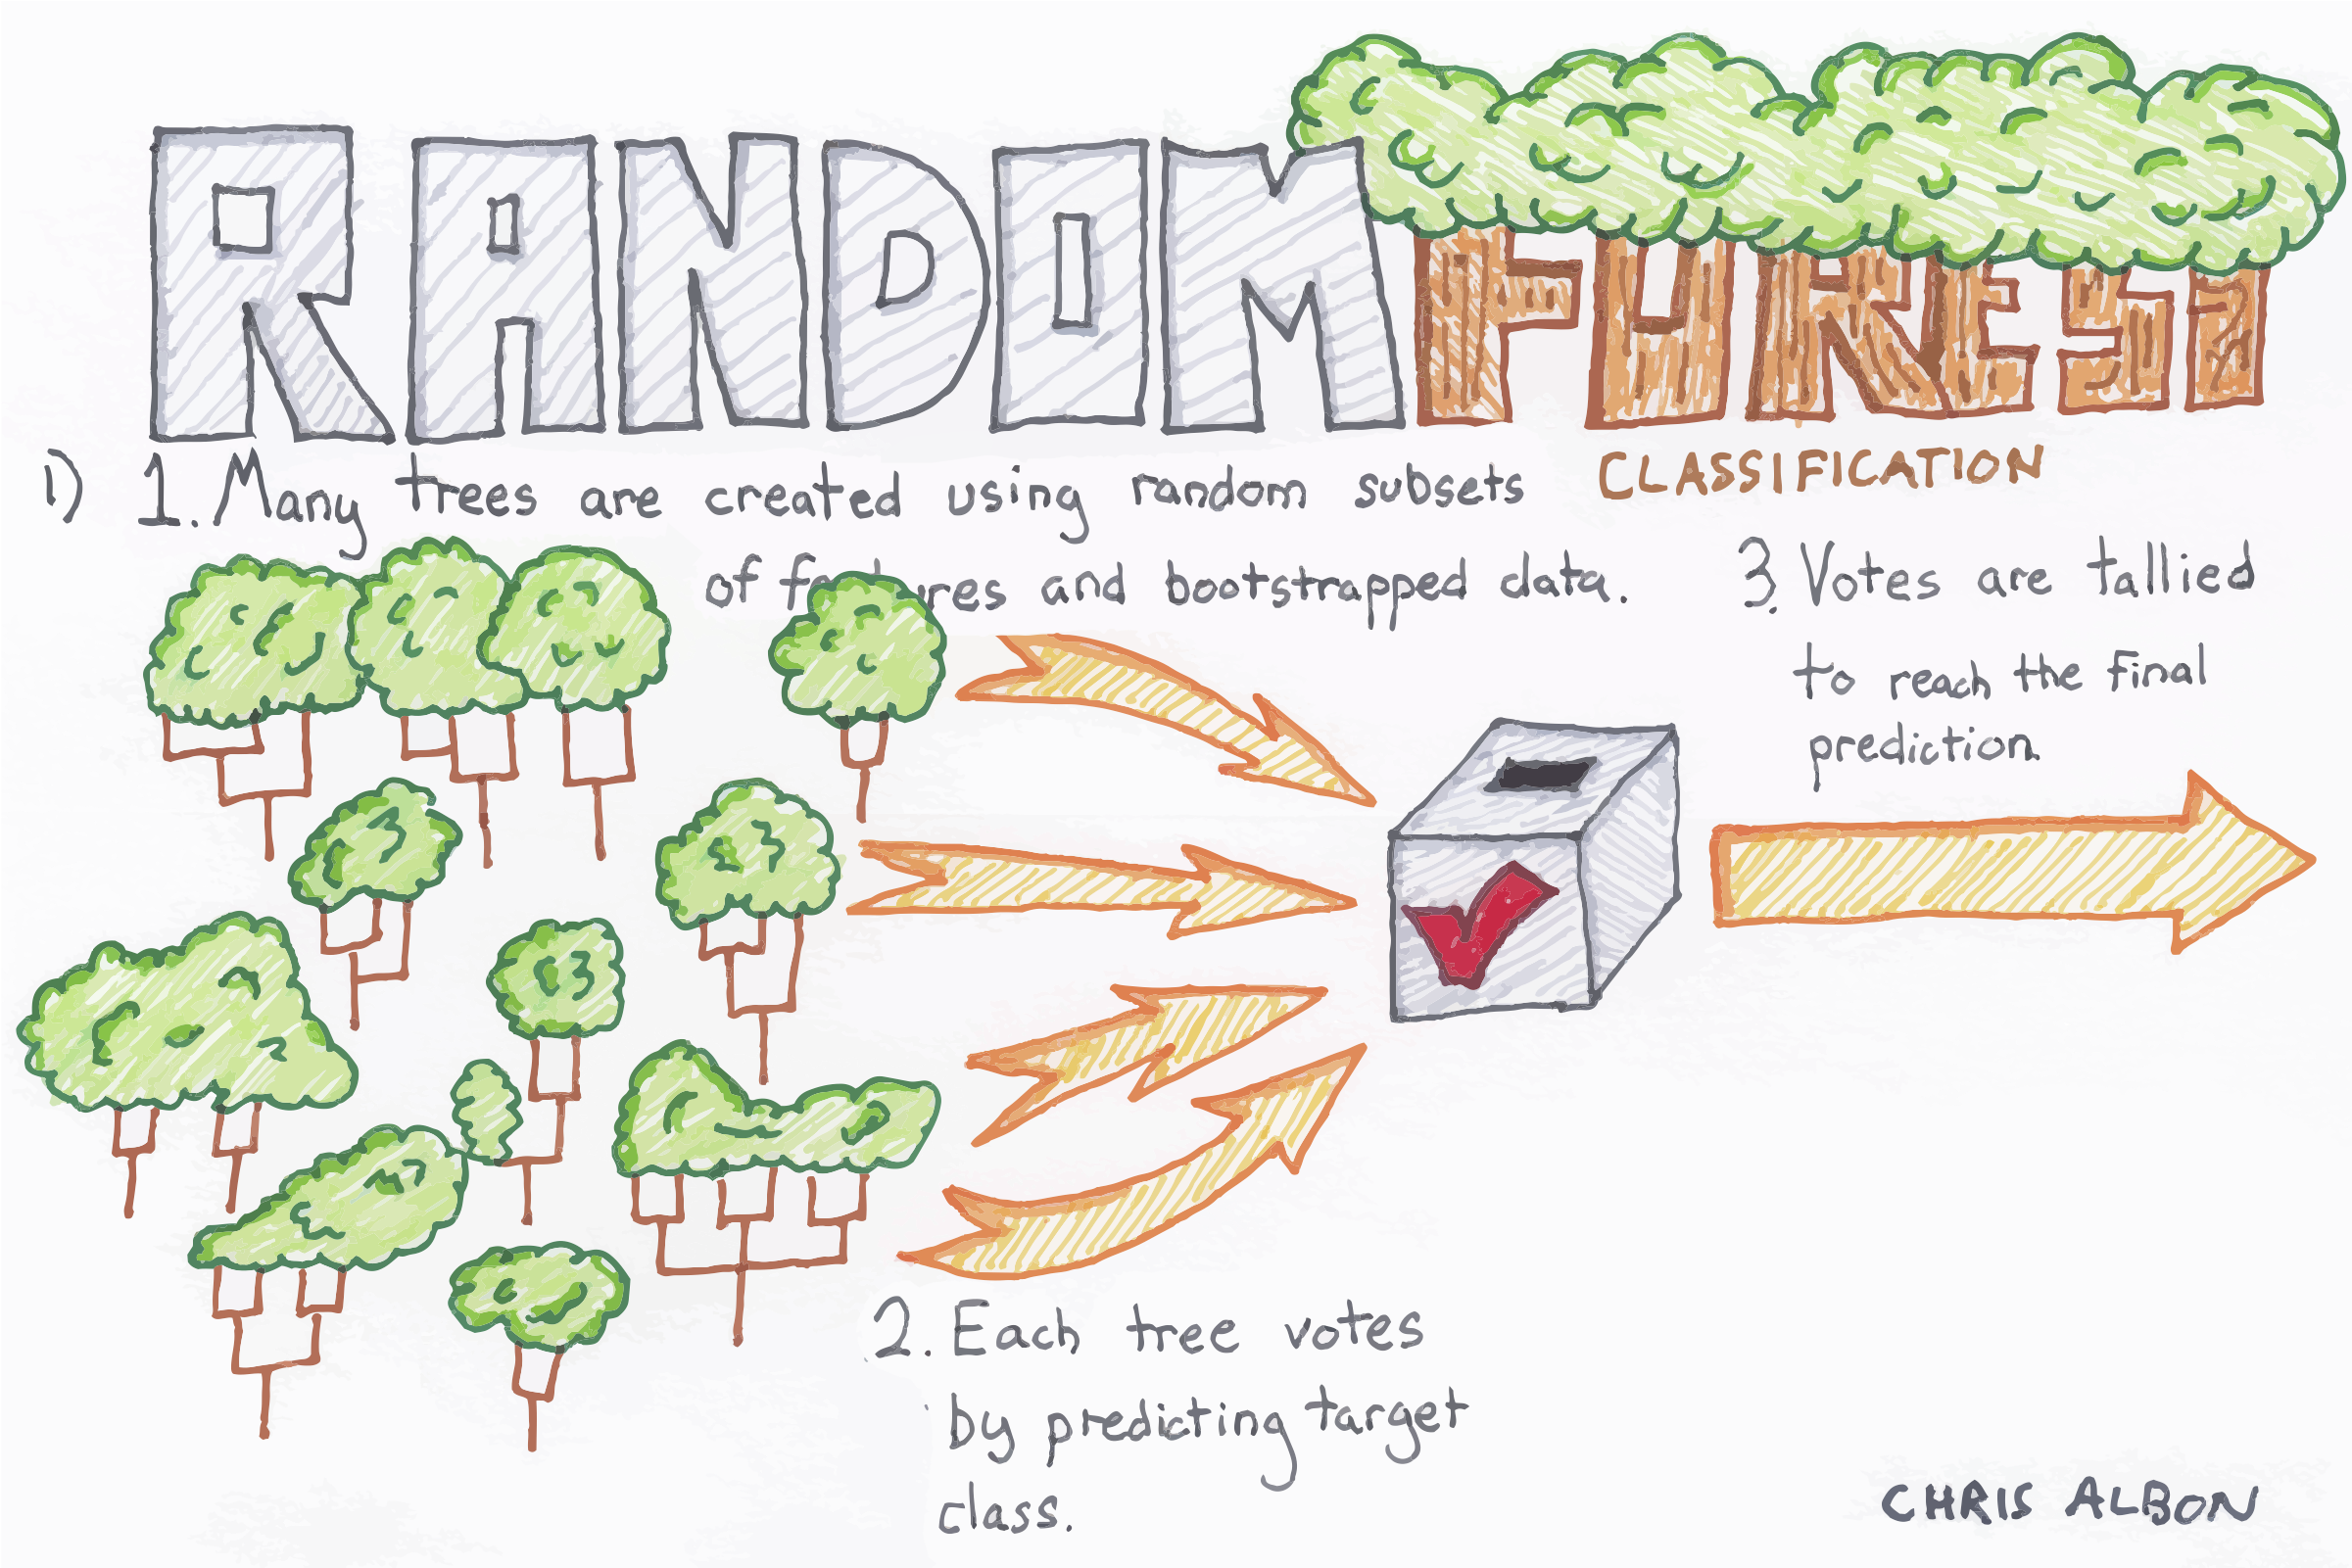

**Porqué RF es poderoso?**

**Leo Breiman** creador del Random Forest demostró que un ensemble podía tener buen poder de generalización sí:

*   Los submodelos tienen buen poder de predicción
*   Los submodelos están descorrelacionados

Así el algoritmo de Random Forest compromete un poco de poder de predicción de cada uno de los **decision trees** que arma, pero la forma aleatoria de generarlos hace que esten fuertemente descorrelacionados.


1. leer Datos
2. Divivir Datos
    - Datos Entrenamiento
    - Datos test
3. Generar Arboles
    *   cuantos arboles? - parametro
    *   para la construcción de cada arbol: 
        - selección registros (filas), cuantas? (conjunto datos) - (usando muestreo con reemplazo) 
                - parametro
                - raiz del numero total de variables
        - para cada conjunto de datos, seleccionar las   caracteristicas, cuantas?
         - parametro
         -  raiz de variables
    *   Crear los arboles
        - cada árbol vota prediciendo la clase objetivo
        - Se cuentan los votos para llegar a la predicción final.     






## Metodos

In [4]:
def viewSizeDf(df):
  fil =df.shape[0] #numero de registros / filas
  col= df.shape[1] -1 # numero columnas (variables)
  print("Tamaño del dataFrame")
  print("Numero Registros ",fil)
  print("Numero Variables ",col)

In [5]:
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['y'] = pd.Series(sklearn_dataset.target)
    return df

In [6]:
def getAll_X_y(df):
    X = df.iloc[:, 0:df.shape[1]-1] 
    y = df.iloc[:, -1] # Última columna
    return X,y

In [7]:
def getSampleX_y(dfTrain,rows,columns):
  #obtener muestra de los registros (filas) de forma aleatoria con reemplazo
  dfS=dfTrain.sample(frac=rows,replace=True)
  # separar la y del dataFrame
  X = dfS.iloc[:, 0:df.shape[1]-1] #todas las col menos la ultima que es y
  ys = dfS.iloc[:, -1] # Última columna que es y
  #obtener muestra de los atributos (col) de forma aleatoria  
  Xs= X.sample(frac=columns, axis=1)
  return Xs,ys

In [8]:
def makeTree(i,dfTrain,nrowsSample,ncolumnsSample): #,X_test):
  XSample,ySample = getSampleX_y(dfTrain,nrowsSample,ncolumnsSample) # dfTrain, cantidadFilas, cantidadColumnas, Fraction= True retorna en % la cantidad
  #print("::Arbol::", i)
  #print("numeros Registros (filas)",len(X))
  #print("numeros Caracteristicas (col)",X.shape[1])
  #print(XSample.head())
  #print(XSample.columns.values)  
  clf = tree.DecisionTreeClassifier()
  clf = clf.fit(XSample, ySample)
  xFeatures = list(XSample.columns.values)
  return clf, xFeatures

In [9]:
def f(x):
  return (x *100 / sum(x))



---



In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set()

In [ ]:
#verificanocoo tener los labels de la col
xFeatures = list(X_test.columns.values)
print((xLabels))
#X_test.loc[:, ['sepal length (cm)', 'petal width (cm)' ,'sepal width (cm)', 'petal length (cm)']]
X_test.loc[:, xFeatures]


In [135]:
%%time
import pandas as pd
import random
from sklearn import tree
import graphviz 
from sklearn.datasets import load_wine
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

#parametros
fractionTest=0.2
nrowsSample= 0.8 #random.uniform(0.5,0.7)
ncolumnsSample = 0.8 #random.uniform(0.5,0.7)
nTree=1000
trees=[]

#data=load_wine()
data = load_iris()
df= sklearn_to_df(data) #convertir los datos de sklearn a dataFrame
print(df.head())
viewSizeDf(df) # Ver dimensiones dataFrame

#-----------------------
X,y = getAll_X_y(df) #cargar todos los X y y
#dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=fractionTest, random_state=0)
#-----------------------


#Unir X y y entrenamiento para obtener las muestras 
dfTrain = X_train
dfTrain['y']=y # queda X y y unidos

#con los datos de entrenamiento dfTrain generar un bosque de tamaño nTree
for i in range(nTree): #con 1000 t=1.85 con 10000 t=17.7
 t=makeTree(i,dfTrain,nrowsSample,ncolumnsSample)
 trees.append(t)

#para cada arbol generado se prueba todos los registros del conjunto de test y se
#genera un "y_predict" correspondiente a cada arbol, es decir con cada arbol se
#predice el "y" para cada registro deñ conjunto test
# se guardan todos los "y_predict" en y_predictForest 

y_predictForest = []
for i in range (nTree):
  y_predict = trees[i][0].predict(X_test.loc[:, trees[i][1]]) #cada arbol se prueba con los datos de test y se tiene los y predichos para cada registro de los datos de test
  #print(y_predict)
  y_predictForest.append(y_predict)
  
#"y_predictForest"  tiene todos los y_predict correspondientes a cada a cada uno de los arboles
# es decir en cada fila de "y_predictForest" corresponde a un arbol y cada columna a cada uno de los registros del conjunto test y 
#su intercepcion indica el valor que predice dicho arbol para ese registro

#para cada registro de los datos de test, se calcula la frecuencia de cada posible valor de y, es decir para cada columna (registro de test) se
#verifica la frecuencia de los valores de "y" predichos por los arboles
#se recorre cada cada una de las columnas (registro de test) y se indica los valores de y predichos

df_Y_PredictF= pd.DataFrame(y_predictForest)
for row in df_Y_PredictF.columns.values:
  freq = df_Y_PredictF.groupby([row]).size().reset_index(name="votosY_predicha").rename(columns={"Col1":"Y"})
  df= pd.DataFrame (freq)
  s= sum(df.iloc[:, 1])
  print(":::     Registro ", row, " de los datos de test")
  for i in df.index: 
    print ("y=", df.iloc[i, 0], " presenta un", (df.iloc[i, 1]*100/s), "% de clasificacion" ) 


#y_predictP = t.predict_proba(X_test)

#print(y_predict)
#print(predict_proba)
#print(t.predict_proba(X_test))

#CM = confusion_matrix(y_test, y_predict)  
#print(CM)
#score = clf.score(X_test, y_test)

#paralelizado
#pool = mp.Pool(mp.cpu_count())
#trees = [pool.apply(makeTree, args=(i,dfTrain, nrowsSample,ncolumnsSample)) for i in range(nTree)] #mas lenta con 1000 t=3.34
#trees = pool.starmap(makeTree, [(i,dfTrain, nrowsSample,ncolumnsSample) for i in range(nTree)]) #con 1000 t=1.42 con 10.000 t= 13.9 <- MEJOR
#pool.close()    

#Asynchronous Parallel Processing
#pool = mp.Pool(mp.cpu_count())
# Step 2: Define callback function to collect the output in `results`
#def collect_result(result):
#    global trees
#    trees.append(result)


# Step 3: Use loop to parallelize
#for i in enumerate(range(nTree)):
#    pool.apply_async(makeTree, args=(i,dfTrain, nrowsSample,ncolumnsSample), callback=collect_result) #con 1000 t=1.8 con 10.000 t= 17.6

# Step 4: Close Pool and let all the processes complete    
#pool.close()

#Pool.starmap_async() #con 1000 t=3.19 con 10.000 t= 30.9
#pool = mp.Pool(mp.cpu_count())
#trees = pool.starmap_async(makeTree, [(i,dfTrain, nrowsSample,ncolumnsSample) for i in enumerate(range(nTree))]).get()
#pool.close()

#para un  registro x (muestra), se verifica la clasificacion con todos los arboles y se indica cual es su 
#categoria 'label' <- datos test
#las variables (atribitos) del registro x de la (muestra) deber ser iguales (inclusive en orden) al cada uno de los arboles
#los arboles tienen los mismos atributos? en numero y orden?


# https://www.machinelearningplus.com/python/parallel-processing-python/


Number of processors:  2
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  y
0                5.1               3.5                1.4               0.2  0
1                4.9               3.0                1.4               0.2  0
2                4.7               3.2                1.3               0.2  0
3                4.6               3.1                1.5               0.2  0
4                5.0               3.6                1.4               0.2  0
Tamaño del dataFrame
Numero Registros  150
Numero Variables  4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


:::     Registro  0  de los datos de test
y= 1  presenta un 2.6 % de clasificacion
y= 2  presenta un 97.4 % de clasificacion
:::     Registro  1  de los datos de test
y= 1  presenta un 90.4 % de clasificacion
y= 2  presenta un 9.6 % de clasificacion
:::     Registro  2  de los datos de test
y= 0  presenta un 100.0 % de clasificacion
:::     Registro  3  de los datos de test
y= 1  presenta un 0.7 % de clasificacion
y= 2  presenta un 99.3 % de clasificacion
:::     Registro  4  de los datos de test
y= 0  presenta un 100.0 % de clasificacion
:::     Registro  5  de los datos de test
y= 1  presenta un 0.1 % de clasificacion
y= 2  presenta un 99.9 % de clasificacion
:::     Registro  6  de los datos de test
y= 0  presenta un 100.0 % de clasificacion
:::     Registro  7  de los datos de test
y= 1  presenta un 97.3 % de clasificacion
y= 2  presenta un 2.7 % de clasificacion
:::     Registro  8  de los datos de test
y= 1  presenta un 85.1 % de clasificacion
y= 2  presenta un 14.9 % de clasific

In [129]:
df_Y_PredictF.columns.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [133]:
#print(trees[5].decision_path(X_train))

#y_predict = t[0].predict(X_test)
#y_predictP = t.predict_proba(X_test)
#= 


#freq = df.groupby(['A', 'B']).size() 
#print(freq)


#y_predict = trees[0][0].predict(X_test.loc[:, trees[0][1]])

#df = DataFrame (People_List,columns=['First_Name','Last_Name','Age'])



  #freq = df_Y_PredictF.groupby([row]).agg(frequency=(row, "count")).head()
  #print(freq)
  #d1 = freq.to_dict()
  #print(d1)
  #print(freq.apply(f))

'''
.groupby("sepal_length")
  .agg(frequency=("sepal_length", "count"))
  .head())

df = df.groupby("Col1")
.size()
.reset_index(name="Count")
.rename(columns={"Col1":"Col_value"})
'''
#freq = df_Y_PredictF.groupby(list(df_Y_PredictF.columns.values)).size() 

#y_predictForest
#print (dfPredict)
## cantidad de arboles= filas , cantidad registros test, columnas


:::     Registro  0  de los datos de test
y= 1  presenta un 3.6 % de clasificacion
y= 2  presenta un 96.4 % de clasificacion
:::     Registro  1  de los datos de test
y= 1  presenta un 93.1 % de clasificacion
y= 2  presenta un 6.9 % de clasificacion
:::     Registro  2  de los datos de test
y= 0  presenta un 100.0 % de clasificacion
:::     Registro  3  de los datos de test
y= 1  presenta un 0.3 % de clasificacion
y= 2  presenta un 99.7 % de clasificacion
:::     Registro  4  de los datos de test
y= 0  presenta un 100.0 % de clasificacion
:::     Registro  5  de los datos de test
y= 1  presenta un 0.2 % de clasificacion
y= 2  presenta un 99.8 % de clasificacion
:::     Registro  6  de los datos de test
y= 0  presenta un 100.0 % de clasificacion
:::     Registro  7  de los datos de test
y= 1  presenta un 96.7 % de clasificacion
y= 2  presenta un 3.3 % de clasificacion
:::     Registro  8  de los datos de test
y= 1  presenta un 85.6 % de clasificacion
y= 2  presenta un 14.4 % de clasific

'\n.groupby("sepal_length")\n  .agg(frequency=("sepal_length", "count"))\n  .head())\n\ndf = df.groupby("Col1")\n.size()\n.reset_index(name="Count")\n.rename(columns={"Col1":"Col_value"})\n'

In [ ]:
#ver arboles
dot_data = tree.export_graphviz(trees[50], out_file=None, filled=True,rounded=True) 
#dot_data = tree.export_graphviz(trees[50], out_file=None, filled=True,rounded=True, feature_names=data.feature_names) 
graph = graphviz.Source(dot_data) 
graph

In [110]:
def f(x):
  return x.values[0]
  #return x.values,(x.values *100 / sum(x.values))
#list(df_Y_PredictF.columns.values)
#print(freq.index)
#print(type(freq))
#print(freq.shape)
#print(freq.loc[0].index)
#print(freq.loc[0].values[1])

'''
d1 = freq.to_dict()
print(d1)
print(d1.keys())
x=d1.values()
print(type(x))
'''

#print(freq.loc[0])
#print(type(freq))
#print(len(freq))
#for i in freq.index:
#  print ("la categoria", freq.loc[0])
#freq.iloc[0].index # Primera fila
#print(freq.apply(f))

df= pd.DataFrame (freq)
s= sum(df.iloc[:, 1])
for i in df.index: 
  print ("y=", df.iloc[i, 0], " presenta un % de clasificacion de ", (df.iloc[i, 1]*100/s)) 




y= 0  presenta un % de clasificacion de  100.0


**Fuentes**



*   https://static.platzi.com/media/public/uploads/15_ensembles_y_optimizacion_de_hiperparametros_00ec6d4d-72b7-48cc-987e-a10b1e685046.html

*  https://pharos.sh/algoritmo-de-bosque-aleatorio-con-python-y-scikit-learn/
